# Understanding the Dataset

In [1]:
#import libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




# Set display options
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_rows', None)  # None means unlimited
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
data = pd.read_csv(r'C:\Users\eakli\Downloads\task\ecole\house-pricing-prediction\apartment-hunter\data\raw\kc_house_data.csv')
data.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#print the shape of the data
print(f"the dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

the dataset contains 21613 rows and 21 columns


In [4]:
#check for columns with missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [6]:
data.describe()["sqft_living"]

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [7]:
data["sqft_living"].var()

843533.6813681519

In [8]:
from scipy import stats
stats.mstats.trimmed_var(data["sqft_living"])

314135.5451943143

<Axes: xlabel='sqft_living', ylabel='Count'>

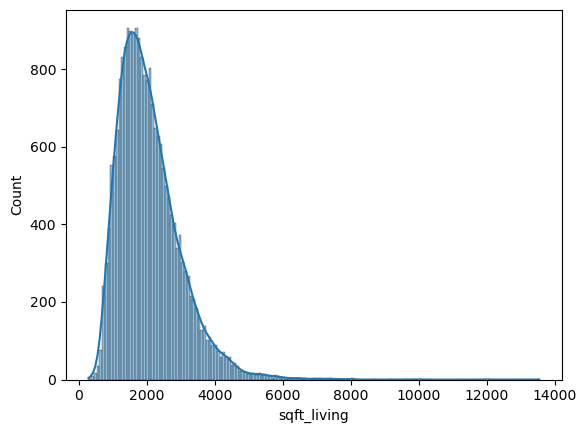

In [11]:
sns.histplot(data["sqft_living"], kde=True)

---
Because variance is the squared deviation from the mean, it's heavily influenced by outliers. When the difference between the outliers and the mean are too far away from each other, the variance might not reveal the true information of how data points are distributed. In this case, we can calculate trimmed variance instead. Trimmed variance is the variance calculated excluding the largest and the smallest data points. Using trimmed_var function in the SciPy library, we can calculate the trimmed variance for a column.

---

<Axes: xlabel='sqft_living', ylabel='Count'>

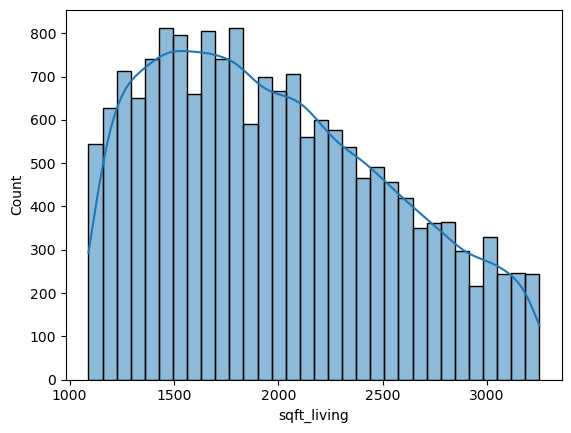

In [18]:
low , high = data["sqft_living"].quantile([0.1, 0.9])
mask_sq_ft = data["sqft_living"].between(low , high)


sns.histplot(data[mask_sq_ft]["sqft_living"], kde=True)

In [14]:
#check for missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
#check for duplicates
print(f"The dataset contains: {data.duplicated(subset='id').sum()} duplicates")

The dataset contains: 177 duplicates


# Data exploration and cleaning points to note

In [ ]:

# Finding duplicated values based on 'id' and keeping all occurrences so we can inspect them
duplicates = data[data.duplicated(subset='id', keep=False)]

# Sorting the DataFrame based on 'id' and 'date' so that duplicates are next to each other
duplicates_sorted = duplicates.sort_values(by=['id', 'date'])


# Plotting a histogram to visually analyze the price of the duplicated values
plt.figure(figsize=(10, 6))
sns.histplot(duplicates['price'], kde=True)
plt.title('Price Distribution of Duplicated Properties')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Output the first few rows to have a view of the duplicated values
duplicates_sorted.head()

In [ ]:
#convert date to datetime
data['date'] = pd.to_datetime(data['date'])

#convert zipcode to object
data["zipcode"]= data["zipcode"].astype("category")

In [ ]:


# Find the earliest and latest dates without time
earliest_date = data['date'].min().normalize()
latest_date = data['date'].max().normalize()

# Calculate the time span in days
time_span_days = (latest_date - earliest_date).days

# Convert days to years, months, and days
years = time_span_days // 365
months = (time_span_days % 365) // 30  # This is an approximation; for exact months, a calendar calculation is required
days = (time_span_days % 365) % 30

print(f"The dataset spans from {earliest_date.date()} to {latest_date.date()}, covering a period of {years} years, {months} months, and {days} days.")

In [ ]:
#check for and remove duplicate values based on id
initial_count = len(data)
data = data.drop_duplicates(subset='id')
final_count = len(data) 

duplicates_removed = initial_count - final_count

print(f"intial count before removing duplicates: {initial_count}")
print(f"Removed {duplicates_removed} duplicates")
print(f"final count after removing duplicates: {final_count}")


In [ ]:
# Ensure correct data types, particularly for columns that might be misleading
# For this dataset, most numerical columns are correctly typed.

# Recheck the data info to ensure our transformations are correct

df_info_after_cleaning = data.info()

# Summary of cleaning actions
cleaning_summary = {
    "Initial Count": initial_count,
    "Final Count": final_count,
    "Duplicates Removed": duplicates_removed
}


(cleaning_summary, df_info_after_cleaning)

In [ ]:
data.head()

# Univatiate Data Analysis

In [ ]:
# Setting up the visualization environment 
sns.set_theme(style="whitegrid")

# Define the figure for the initial set of plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Numerical Variables: Price, Bedrooms, Bathrooms, Sqft_living
sns.histplot(data['price'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Distribution of Prices')
sns.histplot(data['bedrooms'], kde=False, ax=axes[0, 1], discrete=True, color='salmon').set_title('Distribution of Bedrooms')
sns.histplot(data['bathrooms'], kde=False, ax=axes[1, 0], discrete=True, color='lightgreen').set_title('Distribution of Bathrooms')
sns.histplot(data['sqft_living'], kde=True, ax=axes[1, 1], color='gold').set_title('Distribution of Sqft Living')

# Categorical Variables: Waterfront, View
sns.countplot(x='waterfront', data=data, ax=axes[2, 0], palette='coolwarm').set_title('Waterfront Distribution')
sns.countplot(x='view', data=data, ax=axes[2, 1], palette='Set3').set_title('View Distribution')

# Adjusting layout
plt.tight_layout()

plt.show()



---
**Prices**: The distribution of property prices is right-skewed, indicating a concentration of properties in the lower price range with a few high-priced outliers.

**Bedrooms**: Most properties have 2 to 4 bedrooms, with 3 bedrooms being particularly common.

**Bathrooms**: The distribution of bathrooms shows a commonality in properties having around 1 to 2.5 bathrooms, reflecting standard home configurations.

**Sqft Living**: Living space square footage is also right-skewed, highlighting smaller living areas' prevalence with fewer large homes.

**Waterfront**: A vast majority of properties do not have a waterfront, making it a rare feature.

**View**: Properties typically have a view rating of 0, indicating that most do not offer significant view-related advantages.

---



In [ ]:
# Visualize the number of properties per 'zipcode'
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='zipcode', order=data['zipcode'].value_counts().index)
plt.title('Number of Properties per Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Output descriptive statistics for 'zipcode'
data['zipcode'].describe()


---
 **Insights**:
   - **Distribution**: The distribution of properties isn't uniform. Some zipcodes have many more properties than others, which could indicate more densely populated areas or simply areas with more real estate activity within the dataset's timeframe.
   - **Popularity**: Zipcodes with higher property counts might be more popular or growing areas, which could be a factor of interest for market analysis or urban planning.
   - **Data Skewness**: If you're using this data to build predictive models, be aware of this skew. Zipcodes with very few properties could be underrepresented in the model, affecting its predictions.

 **Usage**:
   - **Marketing and Business Strategy**: Real estate agencies might use this information to focus their efforts on areas with high sales volumes.
   - **Urban Development**: Planners might look at why certain areas are more populated and consider infrastructure development.

---



In [ ]:
# Convert 'bathrooms' to a categorical type, since the number of bathrooms is a discrete value
data['bathrooms'] = data['bathrooms'].astype('category')

# Let's visualize the distribution of 'bathrooms' in the dataset
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='bathrooms', order = data['bathrooms'].cat.categories)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)
plt.tight_layout()  # This will adjust spacing to accommodate the labels
plt.show()

# Output descriptive statistics for bathrooms
data['bathrooms'].describe()

---
- **Distribution Observations**:
  - The most common number of bathrooms is around 2.5, which may indicate a typical configuration with two full bathrooms (each with a shower or bathtub) and one half bathroom (just a toilet and a sink).
  - There is a significant drop in frequency as the number of bathrooms increases above 2.5, with very few houses having more than 3.5 bathrooms.
  - The distribution shows that half bathrooms (indicated by the .5 in the numbers) are a common feature in houses.

- **Useful Insights for Real Estate**:
  - Properties with 2 to 3 bathrooms are likely to be the most common in the market and possibly the most in demand.
  - The rarity of houses with a high number of bathrooms (4, 5, 6, etc.) might suggest they are luxury properties or less common due to cost, space, or practicality reasons.

This histogram provides a clear visual representation of how bathroom numbers are distributed among the houses in the dataset, which can help real estate agents, home builders, and buyers understand the market trends and preferences.

---

In [ ]:
# Extending the univariate analysis to include additional variables

# Setting up the figure for the extended set of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 24))

# Additional Numerical Variables
sns.histplot(data['sqft_lot'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Distribution of Sqft Lot')
sns.countplot(x='floors', data=data, ax=axes[0, 1], palette='viridis').set_title('Floors Distribution')
sns.countplot(x='condition', data=data, ax=axes[0, 2], palette='coolwarm').set_title('Condition Distribution')
sns.countplot(x='grade', data=data, ax=axes[1, 0], palette='Set2').set_title('Grade Distribution')
sns.histplot(data['sqft_above'], kde=True, ax=axes[1, 1], color='gold').set_title('Distribution of Sqft Above')
sns.histplot(data[data['sqft_basement'] > 0]['sqft_basement'], kde=True, ax=axes[1, 2], color='lightgreen').set_title('Distribution of Sqft Basement')
sns.histplot(data['yr_built'], kde=False, ax=axes[2, 0], color='salmon').set_title('Year Built Distribution')
sns.histplot(data[data['yr_renovated'] > 0]['yr_renovated'], kde=False, ax=axes[2, 1], color='purple').set_title('Year Renovated Distribution')
sns.histplot(data['zipcode'], kde=False, ax=axes[2, 2], color='orange', bins=70).set_title('Zipcode Distribution')

# Adjusting layout for better visibility
plt.tight_layout()

plt.show()



---

**Sqft Lot Distribution**: The lot size (`sqft_lot`) is right-skewed, indicating that while most properties have smaller lots, there are properties with significantly larger lots.

**Floors Distribution**: Most properties have 1 to 2 floors, with fewer properties featuring more than 2 floors.

**Condition Distribution**: The majority of properties are in average condition (`condition = 3`), with fewer properties rated either below or above average.

**Grade Distribution**: Reflecting construction and design quality, most properties fall within the average grade range (7-8), with fewer properties at the higher end of the scale.

**Sqft Above Distribution**: The square footage above ground level shows a right-skewed distribution, similar to the living area square footage.

**Sqft Basement Distribution**: Many properties have no basement (`sqft_basement = 0`), and for those that do, the basement size varies greatly.

**Year Built Distribution**: The year properties were built shows a wide distribution, with notable peaks indicating periods of increased building activity.

**Year Renovated Distribution**: Only a subset of properties has been renovated, with renovation years spread across recent decades.

**Zipcode Distribution**: The distribution across zip codes reflects the diversity of locations within the dataset, with some zip codes featuring more properties than others.

This comprehensive univariate analysis, grounded in the data dictionary's definitions, provides a solid foundation for understanding the dataset's characteristics. Each variable's distribution offers insights into the properties and their features, setting the stage for the next phase of our EDA, where we'll explore relationships between variables to uncover deeper insights.

---

In [ ]:
# Convert price to millions of dollars for better readability
data['price_millions'] = data['price'] / 1e6

# Redo the univariate analysis for the price column with the prices in millions of dollars
plt.figure(figsize=(10, 6))
sns.histplot(data['price_millions'], kde=True, color='skyblue').set_title('Distribution of Prices (Millions of Dollars)')
plt.xlabel('Price (Millions of Dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Remove the temporary column for cleanliness
data.drop('price_millions', axis=1, inplace=True)


In [ ]:
data.columns

In [ ]:
data["bedrooms"].describe().apply("{0:,.0f}".format)

---
We can see that we have appartments with no bedrooms in the data set and this could attribute to the fact that they could be studios as well.
Let's explore more in the bivariate analysis

---

# Bivariate/Multivariate Analysis

In [ ]:
# Filter the dataset to include only properties without bedrooms
no_bedrooms_df = data[data['bedrooms'] == 0]

# Convert price to millions of dollars for better readability
no_bedrooms_df['price_millions'] = no_bedrooms_df['price'] / 1e6

# Defining a figure to hold all subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 24))

# Plotting the distribution of prices for properties without bedrooms
sns.histplot(no_bedrooms_df['price_millions'], kde=True, ax=axs[0])
axs[0].set_title('Price Distribution of Properties Without Bedrooms')
axs[0].set_xlabel('Price (Millions of Dollars)')
axs[0].set_ylabel('Frequency')

# Plotting the distribution of sqft_living for properties without bedrooms
sns.histplot(no_bedrooms_df['sqft_living'], kde=True, ax=axs[1])
axs[1].set_title('Living Area Sqft Distribution of Properties Without Bedrooms')
axs[1].set_xlabel('Living Area Sqft')
axs[1].set_ylabel('Frequency')

# Plotting the distribution of floors for properties without bedrooms
sns.countplot(x='floors', data=no_bedrooms_df, ax=axs[2])
axs[2].set_title('Floor Distribution of Properties Without Bedrooms')
axs[2].set_xlabel('Number of Floors')
axs[2].set_ylabel('Count')

# Reviewing year built for properties without bedrooms
sns.histplot(no_bedrooms_df['yr_built'], kde=False, bins=30, ax=axs[3])
axs[3].set_title('Year Built Distribution of Properties Without Bedrooms')
axs[3].set_xlabel('Year Built')
axs[3].set_ylabel('Frequency')

# Show the figure with all plots
plt.tight_layout()
plt.show()




---
The series of graphs you've provided depict various characteristics of properties in the dataset that have no bedrooms. Here's a detailed analysis and summary of each graph:

1. **Price Distribution of Properties Without Bedrooms**: This histogram shows that most properties without bedrooms are priced at the lower end of the market, with the majority under $0.2 million. There are very few properties priced above $0.6 million, indicating that properties without bedrooms do not generally reach high price points. The distribution has a long tail, with a small number of properties priced as high as $1.2 million, which are likely outliers with unique features that contribute to their higher value.

2. **Living Area Sqft Distribution of Properties Without Bedrooms**: The living area of properties without bedrooms shows that most have a smaller square footage, with a peak in frequency around 1,000 sqft. There are fewer properties as the living space increases, and very few with more than 4,000 sqft. This suggests that properties without bedrooms tend to be smaller, possibly indicating they are studios or one-room apartments.

3. **Floor Distribution of Properties Without Bedrooms**: This bar chart indicates that single-story properties are the most common among homes without bedrooms, followed by two-story homes. There are very few properties with three or more stories. This could imply that properties without bedrooms are likely to be simpler structures, such as single-level apartments or bungalows.

4. **Year Built Distribution of Properties Without Bedrooms**: The properties without bedrooms appear to have been built across a range of years. There are peaks in the years around 1980 and 2000, indicating periods of more intense construction of such properties. The distribution suggests that while there are properties without bedrooms from various eras, there might be trends or developments in housing that led to more such properties being built or classified in this manner during these times.

Overall, the properties without bedrooms tend to be lower-priced and smaller in size, and they are distributed across various construction years, with peaks in certain periods. These properties could represent a specific market segment, such as studio apartments, which might appeal to individuals or couples looking for more affordable and compact living options. The data suggests that while these properties are less common and varied in the dataset, they present a distinct class of real estate with their own market characteristics.

---

In [ ]:
sns.set_theme(style="whitegrid")

#price correlation with numerical features
correlation_matrix = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

---
the insights this matrix provides:

- **Price and Sqft_living (0.70)**: There's a strong positive correlation between living area square footage and price. This suggests that larger living spaces generally command higher prices.
- **Price and Grade (0.67)**: A similarly strong positive correlation is observed with grade, indicating that higher-quality construction and design are associated with higher property prices.
- **Price and Sqft_above (0.61)**: The square footage above ground also has a significant positive correlation with price, which is expected as it contributes to the overall living space.
- **Price and Bathrooms (0.53)**: There's a moderate positive correlation here, implying that a greater number of bathrooms may contribute to a higher property price.
- **Price and Bedrooms (0.31)**: A positive but weaker correlation compared to other features suggests that while the number of bedrooms does affect price, it may not be as influential as living space or quality grade.
- **Price and Sqft_basement (0.32)**: The presence and size of a basement have a similar moderate correlation with price, hinting that basements are a valued feature but possibly less so than above-ground living area.
- **Price and Floors (0.26)**: A lower positive correlation, indicating that while the number of floors is relevant, it's not among the strongest factors influencing price.

The correlations with `yr_built` and `yr_renovated` are relatively low, suggesting that while age and updates may influence price, their impact is not as pronounced as the size and quality of the home. It's important to remember that correlation does not imply causation, and these relationships could be influenced by other factors not captured in this matrix.

The heatmap also reveals multicollinearity between some features, such as `sqft_living` with `sqft_above` and `bathrooms`, which is logical since larger homes with more living space tend to have more bathrooms and more square footage above ground.

These insights from the correlation matrix can guide further analysis, particularly in understanding which property features are most strongly associated with price and could be considered in predictive modeling or valuation assessments.

---

In [ ]:
#  Price Correlation with Numerical Features
correlation_matrix = data.corr()['price'].sort_values(ascending=False)

# We will analyze the relationships of the top correlated features with 'price'
top_correlated_features = correlation_matrix.index[1:7]

# Plotting scatter plots for the top correlated features with price
plt.figure(figsize=(20, 15))

for i, feature in enumerate(top_correlated_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'Price vs {feature}')
    plt.ylabel('Price (in Dollars)')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
data.info()

In [ ]:
# Convert 'zipcode' to a str data type
data['zipcode'] = data['zipcode'].astype('str')

# Calculate the mean price per zipcode and sort it from high to low
zipcode_mean_price = data.groupby('zipcode')['price'].mean().sort_values().reset_index()

# Convert price to a more readable format (in millions of dollars)
zipcode_mean_price['price'] = zipcode_mean_price['price'] / 1e6

# Create a horizontal bar plot
plt.figure(figsize=(10, 15))
sns.barplot(x='price', y='zipcode', data=zipcode_mean_price,
            orient='h', palette='viridis')
plt.xlabel('Average Price (Millions of dollars)')
plt.ylabel('Zipcode')
plt.title('Average House Price per Zipcode')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest price at the top
plt.show()

In [ ]:
# To analyze the impact of zipcode on prices and consider regrouping based on price ranges,
# let's first examine the average price per zipcode.

# Calculating average price per zipcode
zipcode_avg_price = data.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Converting to DataFrame for easier manipulation and visualization
zipcode_avg_price_df = zipcode_avg_price.reset_index()
zipcode_avg_price_df.columns = ['zipcode', 'average_price']

# Visualizing the top 10 most expensive and least expensive zip codes
plt.figure(figsize=(14, 7))

# Most expensive zip codes
plt.subplot(1, 2, 1)
sns.barplot(x='average_price', y='zipcode', data=zipcode_avg_price_df.head(10), palette='Greens_d')
plt.title('Top 10 Most Expensive Zip Codes')
plt.xlabel('Average Price')
plt.ylabel('Zipcode')

# Least expensive zip codes
plt.subplot(1, 2, 2)
sns.barplot(x='average_price', y='zipcode', data=zipcode_avg_price_df.tail(10), palette='Oranges_d')
plt.title('Top 10 Least Expensive Zip Codes')
plt.xlabel('Average Price')
plt.ylabel('Zipcode')

plt.tight_layout()
plt.show()

# Based on the visualization, consider how to regroup zip codes for the model.


---

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Prepare the data for feature enginnering
geo_data = data[['zipcode', 'lat', 'long']].drop_duplicates()
geo_data['avg_price'] = geo_data['zipcode'].map(zipcode_avg_price)

# Scale the features
scaler = StandardScaler()
geo_data_scaled = scaler.fit_transform(geo_data[['lat', 'long', 'avg_price']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
geo_data['cluster'] = kmeans.fit_predict(geo_data_scaled)

# Create a mapping from zipcode to cluster
zipcode_to_cluster = geo_data.set_index('zipcode')['cluster'].to_dict()

# Map the geographic groupings back to the original properties
data['geo_group'] = data['zipcode'].map(zipcode_to_cluster)\

---

In [ ]:
# We need to check the proportion of properties with waterfront and without waterfront in the dataset
waterfront_count = data['waterfront'].value_counts()

# Now, let's visualize the distribution of prices with respect to waterfront presence
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('House Prices by Waterfront Presence')
plt.xlabel('Waterfront Presence (0 = No, 1 = Yes)')
plt.ylabel('House Price')
plt.yscale('log')  # Using a log scale for better visualization of prices
plt.show()

# Display the count of waterfront properties
waterfront_count



- **Price Distribution**:
  - Properties without waterfront access ('0') have a lower median price compared to waterfront properties ('1').
  - The interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile), is narrower for non-waterfront properties, suggesting less variability in price among the majority of these properties.
  - Waterfront properties ('1') not only have a higher median price but also a wider IQR, indicating a greater spread in the prices of these properties. This suggests more variability in what buyers may pay for waterfront properties, which could be due to factors such as the quality of the waterfront, size of the property, or other amenities.

- **Outliers**:
  - There are outliers in both categories, but notably, there are several high-price outliers in the waterfront category, which are significantly higher than the main price range. This is indicative of a few waterfront properties being valued much higher than the average, potentially due to exceptional features, size, or location.

- **Value Counts**:
  - There are 21,273 properties without waterfront access and only 163 with waterfront access. This shows that waterfront properties are quite rare in this dataset, which could be a factor in their higher prices due to their scarcity and demand.




In [ ]:
# Filter for waterfront properties
waterfront_properties = data[data['waterfront'] == 1]

# Summarize prices
waterfront_prices_summary = waterfront_properties['price'].describe()

# Calculate average price per zipcode for waterfront properties
avg_price_waterfront_zip = waterfront_properties.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Plot the distribution of waterfront property prices
sns.boxplot(x='price', data=waterfront_properties)

# Check if top zipcodes for waterfront properties match overall most expensive zipcodes
top_expensive_zips = data.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).index
top_waterfront_zips = avg_price_waterfront_zip.head(10).index
common_zips = set(top_expensive_zips).intersection(set(top_waterfront_zips))

# Visual comparison
sns.barplot(x=avg_price_waterfront_zip.index, y=avg_price_waterfront_zip.values)
plt.show()

# Print out common zip codes in both categories
print(f"Zip codes that are common in both waterfront and overall expensive properties: {common_zips}")


In [ ]:


# Convert 'date' from object to datetime format and split into new columns
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Remove duplicate entries based on 'id'
data.drop_duplicates(subset='id', inplace=True)

# Now that we have split the date, let's look at the correlation matrix including the new date-related features
corr_matrix = data.corr()

# Display the correlation matrix focusing on 'price' to identify any initial relationships
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Including Date Features')
plt.show()

# Next, we'll perform some bivariate analysis, looking at the relationship between price and the date features
# We'll use scatterplots to see if there's any visible trend over the months and years

# Relationship between Price and Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=data)
plt.title('Price Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.show()

# Relationship between Price and Month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='month', y='price', data=data)
plt.title('Price Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Price in Dollars')
plt.show()

# Relationship between Price and Day of the Month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='day', y='price', data=data)
plt.title('Price Trends Over Days of the Month')
plt.xlabel('Day')
plt.ylabel('Price in Dollars')
plt.show()

# Finally, we could explore multivariate analysis by examining how combinations of features relate to price.
# For example, we might look at how sqft_living and grade together influence price. Let's create a scatterplot for that.

# Relationship between Price, Sqft_living and Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='grade', palette='coolwarm', data=data)
plt.title('Price in Relation to Sqft Living and Grade')
plt.xlabel('Sqft Living')
plt.ylabel('Price in Dollars')
plt.legend(title='Grade')
plt.show()

# These visual analyses will help us understand the influence of time and other factors on property prices.

In [ ]:
# Price by Waterfront
plt.figure(figsize=(6, 4))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Price Distribution by Waterfront Presence')
plt.ylabel('Price (in Dollars)')
plt.xlabel('Waterfront Presence (0 = No, 1 = Yes)')
plt.show()

---

- **Waterfront Presence (0 = No)**: Properties without waterfront access are represented by the blue boxplot. The distribution has a relatively small interquartile range (IQR), shown by the height of the blue box, which means that most of the prices for these properties are clustered within a narrower range. There are many outliers above the upper whisker, indicating that there are still quite a few non-waterfront properties with high prices, though they are exceptions rather than the norm.

- **Waterfront Presence (1 = Yes)**: Properties with waterfront access are represented by the orange boxplot. The IQR is wider for waterfront properties, showing more variability in the prices of these homes. The median price (the horizontal line in the box) of waterfront properties is higher than that of non-waterfront properties, suggesting that having a waterfront generally increases property value. This plot also shows several high-value outliers, indicating that some waterfront properties are priced significantly higher than the average.

Overall, the boxplot demonstrates that waterfront properties tend to be more expensive and have a wider range of prices, while non-waterfront properties are less expensive on average and have a tighter price distribution. This visual analysis supports the idea that waterfront access is a valuable property feature that can significantly affect the property's market price.

---

In [ ]:
# Price Distribution by View Quality
plt.figure(figsize=(6, 4))
sns.boxplot(x='view', y='price', data=data)
plt.title('Price Distribution by View Quality')
plt.ylabel('Price (in Dollars)')
plt.xlabel('View Quality Rating')
plt.show()

---
The provided plot above is a boxplot that represents the distribution of property prices by view quality rating, which ranges from 0 to 4. 

- **View Quality Rating (0)**: The properties with a view quality of 0, indicating no view or a negligible one, show a compact price distribution with many outliers. These outliers suggest that there are some properties without significant views that are priced higher due to other desirable features.

- **View Quality Rating (1 to 4)**: As the view quality rating increases, we generally observe an increase in both the median price (the horizontal line inside the boxes) and the range of prices (the height of the boxes), especially notable at ratings 3 and 4. This implies that properties with better views tend to be sold at higher prices. Additionally, the number of high-price outliers increases with the view rating.

- **Comparison Across Ratings**:
  - Properties with a rating of 1 don't show a significant difference in median price from those with a rating of 0, but the price range starts to widen.
  - Ratings of 2 and above show a clear upward trend in both median price and range, with each step up in the view quality corresponding to an increase in property value.
  - The highest view quality rating (4) shows the greatest variability in price, suggesting that while excellent views can command a premium price, there's substantial variation depending on other factors such as location, property size, and features.

Overall, the plot illustrates a positive relationship between view quality and property prices in the dataset. The value attributed to views in the real estate market is clearly visible, with better views being associated with higher prices. The trend also indicates that the market differentiates between different levels of view quality, particularly valuing properties with the best possible views.

---

In [ ]:

# Price Trends over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='price', estimator='mean')
plt.title('Mean Property Price Over Years')
plt.ylabel('Mean Price')
plt.xlabel('Year')
plt.show()

# Price Trends over Months
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='month', y='price', estimator='mean')
plt.title('Mean Property Price Over Months')
plt.ylabel('Mean Price')
plt.xlabel('Month')
plt.show()

# check for multicollinerity

In [ ]:


# Dropping the 'id' and 'date' columns as they are not useful for multicollinearity analysis
df = data.drop(['id', 'date'], axis=1)

# Calculating the correlation matrix to check for multicollinearity
correlation_matrix = df.corr()

# Identifying features with high multicollinearity
# We will consider a threshold of 0.75 for high correlation which might indicate multicollinearity
high_correlation_threshold = 0.75
highly_correlated_pairs = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs[(colname_i, colname_j)] = correlation_matrix.iloc[i, j]

# Outputting the pairs of features with high multicollinearity
highly_correlated_pairs


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:


# # Convert zipcode to a categorical variable 
# df['zipcode'] = df['zipcode'].astype(str)

# # One-hot encode the zipcode using pandas get_dummies
# zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip')

# # Drop the original 'zipcode' column
# df = df.drop('zipcode', axis=1)

# # Concatenate the original DataFrame with the new 'zipcode' dummy variables
# df = pd.concat([df, zipcode_dummies], axis=1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame after the necessary preprocessing steps

# Prepare the data for VIF calculation by dropping non-numeric columns
# If 'date' is a string or datetime, it should be excluded
numeric_df = df.select_dtypes(include=[np.number])

# Add an intercept for VIF calculation
# VIF calculation requires that an intercept is added to the model
numeric_df_with_constant = add_constant(numeric_df)

# Create an empty DataFrame to store VIF values
vif_df = pd.DataFrame()

# The 'feature' column will hold the names of the variables
vif_df['feature'] = numeric_df_with_constant.columns

# Calculating VIF for each feature
# The 'VIF' column will contain the VIF values for each variable
# The variance_inflation_factor function from the statsmodels library is used
# It iterates over all the variables in the model
vif_df['VIF'] = [variance_inflation_factor(numeric_df_with_constant.values, i)
                  for i in range(numeric_df_with_constant.shape[1])]

# Display the VIF values for each feature
# A VIF value of 1 indicates no correlation between a given variable and any other
# Values above 5 or 10 suggest that a variable is highly correlated with other variables
# These are the variables that might need to be dropped to reduce multicollinearity
print(vif_df)


]
### High Multicollinearity Indicators:
- **`sqft_living`, `sqft_above`, and `sqft_basement`** have VIF values of infinity. This indicates perfect or near-perfect multicollinearity. In real estate datasets, `sqft_living` is often a sum of `sqft_above` and `sqft_basement`, leading to this multicollinearity.
- **Relationships indicated in the VIF output** suggest that `sqft_living` is highly correlated with `sqft_above`, `grade`, and `sqft_living15`, among others.

### Recommendations for Model Training:
- **Drop `sqft_above` or `sqft_basement`**: Since `sqft_living` encompasses the total living area, including above and below ground, we might choose to keep `sqft_living` for its comprehensive representation of a property's size and drop `sqft_above` and `sqft_basement` to eliminate multicollinearity. However, if the distinction between above and below-ground living space is important for our analysis, consider feature engineering or interaction terms that might capture this without causing multicollinearity.

- **Consider `grade` Carefully**: Given its high correlation with `sqft_living` but also its significance in determining a house's construction and design quality, `grade` should be included. It captures an aspect of quality that square footage alone may not.

- **Keep `sqft_living15`**: Although correlated with `sqft_living`, `sqft_living15` offers contextual insight into how a property compares to its neighbors, which can be quite informative for price prediction. The decision to keep it should be weighed against how much unique variance it explains in price beyond what `sqft_living` already does.

- **Watch for Year and Month Interaction**: The negative correlation between `month` and `year` could reflect specific market trends over time. While not indicative of multicollinearity, it suggests temporal dynamics worth exploring, perhaps through time series analysis or by creating an interaction feature that captures the specific timing of sales.

### Actions:
- **Preprocess `zipcode`**: Since `zipcode` turned into many one-hot encoded variables, increasing model complexity, consider whether the geographical information it provides can be captured with fewer variables, like `lat` and `long`, or through a reduced number of grouped zip code categories.

- **VIF Threshold**: The general threshold for VIF is 5 or 10, but this can be flexible based on the context. For example, `grade` has a VIF slightly below these thresholds and provides valuable information, so it might still be considered for inclusion.

- **Final Feature Selection**: Based on the analysis, consider training the model with `sqft_living`, `grade`, `sqft_living15`, geographical coordinates (`lat`, `long`), and other variables with lower VIF scores like `bathrooms`, `view`, `condition`, and temporal features (`year`, `month`, `day`), after careful consideration of their relevance and multicollinearity.

### Conclusion:
The decision on which features to keep should balance statistical metrics like VIF with domain knowledge about what factors influence house prices. Iteratively refining the model, considering feature importance, and cross-validation performance will guide the final selection for optimal model performance.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans


# # Prepare the data for feature enginnering
# geo_data = data[['zipcode', 'lat', 'long']].drop_duplicates()
# geo_data['avg_price'] = geo_data['zipcode'].map(zipcode_avg_price)

# # Scale the features
# scaler = StandardScaler()
# geo_data_scaled = scaler.fit_transform(geo_data[['lat', 'long', 'avg_price']])

# # Apply K-Means Clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# geo_data['cluster'] = kmeans.fit_predict(geo_data_scaled)

# # Create a mapping from zipcode to cluster
# zipcode_to_cluster = geo_data.set_index('zipcode')['cluster'].to_dict()

# # Map the geographic groupings back to the original properties
# data['geo_group'] = data['zipcode'].map(zipcode_to_cluster)


In [ ]:
data.bathrooms.value_counts()

In [ ]:

# Assuming df is your DataFrame and 'bathrooms' is the column of interest
df['full_bathrooms'] = df['bathrooms'].apply(lambda x: int(x))  # Full bathrooms are the integer part
df['half_bathrooms'] = df['bathrooms'].apply(lambda x: (x - int(x)) * 2)  # Half bathrooms are the fractional part, multiplied by 2

# Create a feature for unusual bathroom counts
df['unusual_bath_count'] = df['bathrooms'].isin([0, 0.75]).astype(int)

# Investigate properties with 0 bathrooms
properties_with_no_bathrooms = df[df['bathrooms'] == 0]


In [ ]:
df[["full_bathrooms",	"half_bathrooms", 	"unusual_bath_count"]].describe()